In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

# 1. Загружаем данные

In [51]:
url = "https://raw.githubusercontent.com/KateNovikova1806/MachineLearning/main/MoviesOnStreamingPlatforms_updated.csv"
data_raw = pd.read_csv(url)


## Описание задачи

   Датасет содержит данные более, чем о 16 тясячах фильмов. Для каждого фильма указана платформа, где его можно посмотреть, а также средний рейтинг фильма, целевая возрастная аудитория, год, в котором был снят фильм и оценка популярности.

   Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует названию фильма) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [52]:
data_raw.shape

(16744, 17)

Первые строки таблицы:

In [132]:
data_raw.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0



Столбцы (признаки) имеют имена

1. The year in which the movie was produced - год, в котором вышел фильм.
2. Age - возрастная категория.
3. IMDb rating - рейтинг на IMDb.
4. Rotten Tomatoes - рейтинг на Rotten Tomatoes.
5. Whether the movie is found on Netflix - наличие фильма на Netflix.
6. Whether the movie is found on Hulu - наличие фильма на Hulu.
7. Whether the movie is found on Prime Video - наличие фильма на Prime Video.
8. Directors - режиссеры фильма.
9. Genres - жанр фильма.
10. Country - страна, в которой снят фильм.
11. Language - язык оригинала.
12. Runtime - длительность фильма.



Признаки (5), (6), (7) - бинарные, (2), (4), (8), (9), (10), (11), (12) - номинальные (категориальные), остальные признаки - количественные (числовые).

Имена признаков представлены ниже.

In [58]:
data_raw.columns

Index(['Unnamed: 0', 'ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type', 'Directors',
       'Genres', 'Country', 'Language', 'Runtime'],
      dtype='object')

Имена строк совпадают с порядковым номером фильма (ID)

# 2. Визуализация данных и вычисление основных характеристик

Сводная информация о признаках:

In [60]:
data_raw.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000



Для каждого количественного признака приведены: 
1. средние значения (mean) - среднее арифметическое
2. стандартное отклонение - показатель рассеивания значений случайной величины относительно её математического ожидания.
3. минимальное и макимальное значения
4. медиана - это значение делящее распределение пополам. Другими словами это значение ниже которого находятся половина значений, и выше также половина всех значений в распределении.
5. значения квантилей - значение, которое заданная случайная величина не превышает с фиксированной вероятностью.

# 3. Обработка категориальных признаков

Столбцы 'Directors', 'Genres', 'Country', 'Languages', 'Age' содержат категориальные признаки. Пока они имеют тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [74]:
data_raw['Directors'].dtype

dtype('O')

In [77]:
data_raw['Directors'] = data_raw['Directors'].astype('category')

In [78]:
data_raw['Directors'].dtype

CategoricalDtype(categories=['A'Ali de Sousa', 'A. Bhimsingh', 'A. Edward Sutherland',
                  'A. Edward Sutherland,John Rawlins', 'A. Fishman',
                  'A. Jagadesh', 'A. Majid', 'A. Salaam', 'A. Todd Smith',
                  'A. Troy Thomas',
                  ...
                  'Álvaro de Armiñán', 'Ángel Izquierdo,Ricardo Ramón',
                  'Árpád Sopsits', 'Çetin Inanç,Robert Aldrich,Bert I. Gordon',
                  'Édouard Molinaro', 'Élie Chouraqui', 'Émile Gaudreault',
                  'Óskar Thór Axelsson', 'Ömer Faruk Sorak', 'Özcan Alper'],
                 ordered=False)

In [79]:
data_raw['Genres'].dtype

dtype('O')

In [82]:
data_raw['Genres'] = data_raw['Genres'].astype('category')

In [83]:
data_raw['Genres'].dtype

CategoricalDtype(categories=['Action', 'Action,Adventure', 'Action,Adventure,Biography',
                  'Action,Adventure,Biography,Drama,History',
                  'Action,Adventure,Biography,Drama,History,Romance,War',
                  'Action,Adventure,Biography,Drama,Romance',
                  'Action,Adventure,Comedy', 'Action,Adventure,Comedy,Crime',
                  'Action,Adventure,Comedy,Crime,Drama,Romance',
                  'Action,Adventure,Comedy,Crime,Drama,Thriller',
                  ...
                  'Thriller,Mystery', 'Thriller,War', 'War', 'War,Documentary',
                  'War,Drama', 'Western', 'Western,Comedy', 'Western,Horror',
                  'Western,Mystery', 'Western,War'],
                 ordered=False)

In [84]:
data_raw['Country'].dtype

dtype('O')

In [85]:
data_raw['Country'] = data_raw['Country'].astype('category')
data_raw['Country'].dtype

CategoricalDtype(categories=['Afghanistan,France', 'Afghanistan,United States',
                  'Albania,Austria,France', 'Albania,Greece,France',
                  'Albania,United States', 'Algeria,France', 'Argentina',
                  'Argentina,Australia', 'Argentina,Austria,Germany',
                  'Argentina,Brazil',
                  ...
                  'West Germany,Mexico,Peru', 'West Germany,Peru',
                  'West Germany,South Africa,United States',
                  'West Germany,Spain', 'West Germany,Sweden,United States',
                  'West Germany,Switzerland,United States',
                  'West Germany,United States', 'Yugoslavia',
                  'Yugoslavia,United States', 'Zambia,Sweden'],
                 ordered=False)

In [88]:
data_raw['Language'].dtype

dtype('O')

In [90]:
data_raw['Language'] = data_raw['Language'].astype('category')
data_raw['Language'].dtype

CategoricalDtype(categories=['Aboriginal,English', 'Aboriginal,Portuguese', 'Afrikaans',
                  'Afrikaans,English', 'Akan', 'Akan,English', 'Albanian',
                  'American Sign Language,English',
                  'American Sign Language,English,Spanish', 'Arabic',
                  ...
                  'Urdu,Tajik,Russian', 'Vietnamese',
                  'Vietnamese,English,Japanese', 'Wolof,French,English,Arabic',
                  'Xhosa,Southern Sotho,English,Afrikaans',
                  'Yiddish,English,Irish,Chinese,Hebrew',
                  'Yiddish,English,Spanish', 'Yoruba,English,Ibo,Hausa',
                  'Yoruba,Ibo,English', 'Zulu'],
                 ordered=False)

In [138]:
data_raw['Age'].dtype

dtype('O')

In [139]:
data_raw['Age'] = data_raw['Age'].astype('category')
data_raw['Age'].dtype

CategoricalDtype(categories=['13+', '16+', '18+', '7+', 'all'], ordered=False)

In [154]:
data_raw['Rotten Tomatoes'].dtype

dtype('O')

In [155]:
data_raw['Rotten Tomatoes'] = data_raw['Rotten Tomatoes'].astype('category')
data_raw['Rotten Tomatoes'].dtype

CategoricalDtype(categories=['10%', '100%', '11%', '12%', '13%', '14%', '15%', '16%',
                  '17%', '18%', '19%', '2%', '20%', '21%', '22%', '23%', '24%',
                  '25%', '26%', '27%', '28%', '29%', '3%', '30%', '31%', '32%',
                  '33%', '34%', '35%', '36%', '37%', '38%', '39%', '4%', '40%',
                  '41%', '42%', '43%', '44%', '45%', '46%', '47%', '48%',
                  '49%', '5%', '50%', '51%', '52%', '53%', '54%', '55%', '56%',
                  '57%', '58%', '59%', '6%', '60%', '61%', '62%', '63%', '64%',
                  '65%', '66%', '67%', '68%', '69%', '7%', '70%', '71%', '72%',
                  '73%', '74%', '75%', '76%', '77%', '78%', '79%', '8%', '80%',
                  '81%', '82%', '83%', '84%', '85%', '86%', '87%', '88%',
                  '89%', '9%', '90%', '91%', '92%', '93%', '94%', '95%', '96%',
                  '97%', '98%', '99%'],
                 ordered=False)

In [91]:
data_raw.describe(include=['category'])

,Title,Directors,Genres,Country,Language
count,16744,16018,16469,16309,16145
unique,16744,11338,1909,1303,1102
top,워터댄스,Jay Chapman,Drama,United States,English
freq,1,36,1341,8776,10955


## Построение диаграмм рассеивания

Построим диаграмму рассеивания для признаков 'Year' и 'IMDb'. На ней показано, количество фильмов на платформе в зависимости от года выпуска:

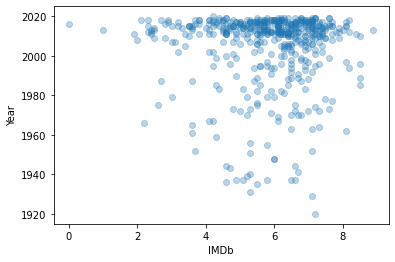

In [114]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=500, replace=False)
plt.scatter(data_raw.iloc[random_subset]['IMDb'], data_raw.iloc[random_subset]['Year'], alpha=0.3)
plt.ylabel('Year')
plt.xlabel('IMDb')
pass

Из диаграммы видно, что большее количество фильмов, которые вышли в прокат после 2000 года.

Построим диаграмму рассеивания для признаков 'Year' и 'Runtime'. На ней показана зависимость длительности фильма от года его выхода.

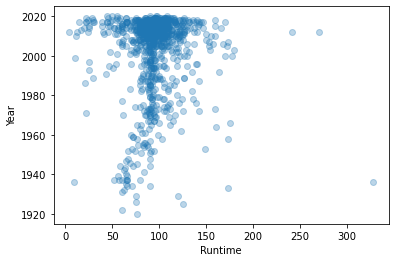

In [117]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
plt.scatter(data_raw.iloc[random_subset]['Runtime'], data_raw.iloc[random_subset]['Year'], alpha=0.3)
plt.ylabel('Year')
plt.xlabel('Runtime')
pass

Из диаграммы видно, что длительность фильма не зависит от года выхода в прокат.

# 4. Обработка пропущенных значений

Посмотрим, сколько пропущенных значений в каждом столбце матрицы

In [133]:
data_raw.isna().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                   0
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime                0
dtype: int64

Необходимо заполнить пропущенные значения средним или медианой (для количественных признаков) или модой (для номинальных признаков).

Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам:

In [134]:
data_raw.fillna(data_raw.median(axis = 0), axis = 0, inplace=True)

In [136]:
data_raw.isna().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                   0
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime                0
dtype: int64

Пропущенные значения в столбцах, соответствующих категориальным признакам, заполним модой:

In [157]:
data_raw['Age'].fillna(data_raw['Age'].mode().iloc[0], inplace=True)
data_raw['Directors'].fillna(data_raw['Directors'].mode().iloc[0], inplace=True)
data_raw['Country'].fillna(data_raw['Country'].mode().iloc[0], inplace=True)
data_raw['Language'].fillna(data_raw['Language'].mode().iloc[0], inplace=True)
data_raw['Runtime'].fillna(data_raw['Runtime'].mode().iloc[0], inplace=True)
data_raw['Genres'].fillna(data_raw['Genres'].mode().iloc[0], inplace=True)
data_raw['Rotten Tomatoes'].fillna(data_raw['Rotten Tomatoes'].mode().iloc[0], inplace=True)

In [158]:
data_raw.isna().sum()

Unnamed: 0         0
ID                 0
Title              0
Year               0
Age                0
IMDb               0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
Directors          0
Genres             0
Country            0
Language           0
Runtime            0
dtype: int64

In [159]:
data_raw.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16744.000000
mean,8371.500000,8372.500000,2003.014035,5.909478,0.212613,0.053930,0.737817,0.033684,0.0,93.363473
std,4833.720789,4833.720789,20.674321,1.325168,0.409169,0.225886,0.439835,0.180419,0.0,27.717073
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,83.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,103.250000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [160]:
data_raw.describe(include=['category'])

,Title,Age,Rotten Tomatoes,Directors,Genres,Country,Language
count,16744,16744,16744,16744,16744,16744,16744
unique,16744,5,99,11338,1909,1303,1102
top,워터댄스,18+,100%,Jay Chapman,Drama,United States,English
freq,1,12864,11993,762,1616,9211,11554


# 5. Нормализация количественных признаков

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из двух следующих способов:

1. приведение к отрезку $[0,1]$ - это линейное преобразование, приводящее все значения к заданному отрезку;

2. стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

Выполним стандартизацию всех признаков: